# Pytorch - Introducción

Hast ahora hemos implementado nuestros propios modelos de `Machine Learning` utilizando `Python` y `Numpy`. Este ejercicio nos ha servido para aprender mejor a utilizar estas herramientas de `análisis de datos` así como a conocer en gran detalle algunos de los elementos fundamentales de las redes neuronales: el [perceptrón](https://sensioai.com/blog/018_perceptron_final), el algoritmo de [descenso por gradiente](https://sensioai.com/blog/013_perceptron2), el [perceptrón multicapa](https://sensioai.com/blog/025_mlp_framework), etc. Sin embargo, de ahora en adelante, utilizaremos frameworks desarrollados por terceros. En el [post anterior](https://sensioai.com/blog/026_frameworks) hablamos en detalle de los motivos y presentamos algunos ejemplos. En este post, empezamos a aprender a trabajar con uno de los frameworks de `redes neuronales` más utilizados hoy en día: [Pytorch](https://pytorch.org/).

> ⚡ Si trabajas en Google Colab ya tendrás `Pytorch` instalado. Si quieres trabajar en local, simplemente sigue las instrucciones en https://pytorch.org/. Te recomiendo la instalación con `conda`, sobre todo si quieres soporte para GPU.

In [1]:
import torch

## ¿ Qué es Pytorch ?

`Pytorch` es un framework de `redes neuronales`, un conjunto de librerías y herramientas que nos hacen la vida más fácil a la hora de diseñar, entrenar y poner en producción nuestros modelos de `Deep Learning`. Una forma sencilla de entender qué es `Pytorch` es la siguiente:

$$ Pytorch = Numpy + Autograd + GPU $$

Vamos a ver qué significa cada uno de estos términos.

## NumPy

Quizás la característica más relevante de `Pytorch` es su facilidad de uso. Esto es debido a que sigue una interfaz muy similar a la de `NumPy`, y como nosotros ya sabemos trabajar con esta librería no deberíamos tener muchos problemas para aprender a trabajar con `Pytorch` 😁.

> 🧠 Si no estás familiarizado con la librería `NumPy` te recomiendo que le eches un vistazo a nuestros posts en los que aprendemos a trabajar con esta librería.

De la misma manera que en `NumPy` el objeto principal es el `ndarray`, en `Pytorch` el objeto principal es el `tensor`. Podemos definir un tensor de manera similar a como definimos un array, incluso podemos inicializar tensores a partir de arrays.

In [2]:
# matriz de ceros, 5 filas y 3 columnas

x = torch.zeros(5, 3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [3]:
# tensor con valores aleatorios

x = torch.randn(5, 3, 2)
x

tensor([[[-0.5095,  1.0299],
         [-0.3074, -0.5623],
         [-0.2425, -0.7024]],

        [[-0.6972, -0.2838],
         [ 1.1807, -0.3065],
         [ 1.1043, -0.3139]],

        [[-0.8232,  1.6546],
         [-0.0494,  1.6574],
         [-1.2678,  0.0900]],

        [[-0.3859,  0.3659],
         [ 2.8198, -0.3422],
         [-0.0778,  0.5583]],

        [[ 0.8159, -0.3786],
         [-0.6894, -1.1519],
         [ 0.6318,  1.3711]]])

In [4]:
# tensor a partir de lista

x = torch.tensor([[1, 2, 3],[4, 5, 6]])
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [5]:
import numpy as np

# tensor a partir de array

a = np.array([[1, 2, 3],[4, 5, 6]])
x = torch.from_numpy(a)
x

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

Y como puedes esperar, prácticamente todos los conceptos que ya conocemos para trabajar con `NumPy` pueden aplicarse en `Pytorch`. Esto incluye operaciones aritméticas, indexado y troceado, iteración, vectorización y broadcasting.

In [6]:
# operaciones

x = torch.randn(3, 3)
y = torch.randn(3, 3)

print(x)
print(y)

tensor([[-0.7224, -0.1026, -1.5667],
        [ 0.0986,  0.8910,  0.3179],
        [-0.2251,  0.2169,  1.1286]])
tensor([[-0.0694, -0.0292,  1.1528],
        [ 0.9015, -0.7482,  1.1096],
        [ 0.3367,  1.1905,  1.7464]])


In [7]:
x + y

tensor([[-0.7919, -0.1318, -0.4139],
        [ 1.0001,  0.1429,  1.4275],
        [ 0.1116,  1.4074,  2.8750]])

In [8]:
x - y

tensor([[-0.6530, -0.0734, -2.7195],
        [-0.8029,  1.6392, -0.7918],
        [-0.5618, -0.9736, -0.6178]])

In [9]:
# indexado

# primera fila

x[0]

tensor([-0.7224, -0.1026, -1.5667])

In [10]:
# primera fila, primera columna

x[0, 0]

tensor(-0.7224)

In [11]:
# primera columna

x[0, :]

tensor([-0.7224, -0.1026, -1.5667])

In [12]:
# troceado

x[:-1, 1:]

tensor([[-0.1026, -1.5667],
        [ 0.8910,  0.3179]])

Una funcionalidad importante del objeto `tensor` que utilizaremos muy a menudo es cambiar su forma. Esto lo conseguimos con la función `view`.

In [13]:
x.shape

torch.Size([3, 3])

In [14]:
# añadimos una dimensión extra

x.view(1, 3, 3).shape

torch.Size([1, 3, 3])

In [15]:
x

tensor([[-0.7224, -0.1026, -1.5667],
        [ 0.0986,  0.8910,  0.3179],
        [-0.2251,  0.2169,  1.1286]])

In [16]:
# estiramos en una sola dimensión

# a = x.view(9).shape
a = x.view(9)

In [17]:
a

tensor([-0.7224, -0.1026, -1.5667,  0.0986,  0.8910,  0.3179, -0.2251,  0.2169,
         1.1286])

In [18]:
# usamos -1 para asignar todos los valores restantes a una dimensión

b = x.view(-1).shape

In [19]:
b

torch.Size([9])

Podemos transformar un `tensor` en un `array` con la función `numpy`.

In [20]:
x.numpy()

array([[-0.72244126, -0.10258867, -1.5666742 ],
       [ 0.09863745,  0.891025  ,  0.31786954],
       [-0.22511986,  0.2168775 ,  1.1285812 ]], dtype=float32)

Como puedes ver, un `tensor` de `Pytorch` es muy similar a un `array` de `NumPy`. Aquí hemos visto alguna de la funcionalidad más útil, puedes aprender más [aquí](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py).

## Autograd

Ya hemos visto que `Pytorch` es muy similar a `NumPy`, sin embargo su funcionalidad va más allá de una estructura de datos eficiente con la que podemos llevar a cabo operaciones (para eso ya nos basta con `NumPy`). La funcionalidad más importante que `Pytorch` añade es la conocidad como `autograd`, la cual nos proporciona la posibilidad de calcular derivadas de manera automática con respecto a cualquier `tensor`. Esto le da a `Pytorch` un gran potencial para diseñar `redes neuronales` complejas y entrenarlas utilizando algoritmos de gradientes sin tener que calcular todas estas derivadas manualmente (como hemos hecho en los posts anteriores). Para poder llevar a cabo estas operaciones, `Pytorch` va construyendo de manera dinámica un `grafo computacional`. Cada vez que aplicamos una operación sobre uno o varios tensores, éstos se añaden al `grafo computacional` junto a la operación en concreto. De esta manera, si queremos calcular la derivada de cualquier valor con respecto a cualquier tensor, simplemente tenemos que aplicar el algoritmo de `backpropagation` (que no es más que la regla de la cadena de la derivada) en el `grafo`. Vamos a ilustrarlo con un ejemplo.

In [21]:
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(2., requires_grad=True)
p = x + y

z = torch.tensor(3., requires_grad=True)
g = p * z

En la celda anterior hemos definido tres `tensores`: $x$, $y$ y $z$. En primer lugar, para poder calcular derivadas con respecto a estos tensores necesitamos ponder su propiedad `requiers_grad` a `True`. Ahora, calculamos el tensor intermedio $p$ como $p = x+ y$ y luego usamos este valor para calcular el resultado final $g$ como $g = p*z$. Cada vez que aplicamos una operación sobre un tensor que tiene su propiedad `requires_grad` a `True`, `Pytorch` irá construyendo el `grafo computacional`. Para este ejemplo, el grafo tendría la siguiente forma

![](https://www.tutorialspoint.com/python_deep_learning/images/computational_graph_equation2.jpg)

Si ahora queremos calcular las derivadas de $g$ con respecto a $x$, $y$ y $z$, es tan fácil como llamar a la función `backward`.

In [22]:
g.backward()

En este punto, `Pytorch` ha aplicado el algoritmo de `backpropagation` encima del grafo computacional, calculando todas las derivadas.

$$ \frac{dg}{dz} = p $$

In [23]:
z.grad

tensor(3.)

$$ \frac{dg}{dx} = \frac{dg}{dp} \frac{dp}{dx} = z $$

In [24]:
x.grad

tensor(3.)

$$ \frac{dg}{dy} = \frac{dg}{dp} \frac{dp}{dy} = z $$

In [25]:
y.grad

tensor(3.)

Como puedes ver, el `grafo computacional` es una herramienta extraordinaria para diseñar `redes neuronales` de complejidad arbitraria. Con una simple función, gracias al algoritmo de `backpropagation`, podemos calcular todas las derivadas de manera sencilla (cada nodo que representa una operación solo necesita calcular su propia derivada de manera local) y optimizar el modelo con nuestro algoritmo de gradiente preferido.

> 💡 Sabiendo que el `perceptrón` leva a cabo la operación $\hat{y} = f(\mathbf{w} \cdot \mathbf{x} + b)$, ¿te ves capaz de dibujar su grafo computacional?

Añadiendo `autograd` encima de `NumPy`, `Pytorch` nos ofrece todo lo que necesitamos para diseñar y entrenar `redes neuronales`. Puedes aprender más sobre `autograd` [aquí](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py). Sin embargo, si queremos entrenar redes muy grandes o utilizar datasets muy grandes (o ambas), el proceso de entrenamiento será muy lento. Es aquí donde entra en juego el último elemento que hace de `Pytorch` lo que es.

## GPU

Si has prestado atención durante nuestro viaje a través de las diferentes implementaciones que hemos llevado a cabo en los posts anteriores, te habrás dado cuenta que, en su mayoría, nuestros modelos llevan a cabo una operación simple: el producto de matrices. Esta operación puede ser muy lenta si estas matrices son muy grandes. Sin embargo, existe hardware especializado en acelerar precisamente este tipo de operaciones: las unidades de procesado gráfico, o GPUs.

![](https://media.metrolatam.com/2019/08/05/cqierczlxyy4lox3-759570a83e907b6bfd77a3964c65fec3.jpg)

Si eres *gamer* hay poco sobre este tipo de hardware que no sepas. Para el resto, este chip (que puedes entender como un mini-ordenador dentro de tu ordenador) fue diseñado con el objetivo de acelerar los cálculos necesarios para renderizar una escena tridimensional en la pantalla de tu ordenador. Estas escenas se representan mediante triángulos con una posición determinada en el mundo virtual que se desea representar, y en cada fotograma se tiene que calcular su posición relativa a una cámara virtual, el punto de vista de la cual es renderizado en tu pantalla. Si estas escenas tienen muchos triángulos, hacer estos cálculos en la CPU (la unidad de procesado central de tu ordenador) pueden llevar mucho tiempo, destruyendo la experiencia en tiempo real que los videojuegos requieren. Es por este motivo que utilizamos GPUs, hardware especializado en llevar a cabo estas operaciones de manera rápida permitiendo las experiencias fluidas a las que estamos acostrumbrados hoy en día. Da la casualidad que el tipo de operaciones necesarias para calcular la posición de estos triángulos es la misma que necesitamos para entrenar nuestras `redes neuronales`: el producto de (grandes) matrices. El uso de GPUs para acelerar el entrenamiento de modelos de `Deep Learning` ha supuesto una gran revolución en la última década, y es uno de los motivos principales de la explosión que estamos viviendo en el aumento de aplicaciones.

![](https://www.researchgate.net/profile/Tolga_Soyata/publication/322525660/figure/fig2/AS:613882104139786@1523372307595/Inside-a-computer-containing-an-i7-5930K-CPU-10-CPU5-in-Table-31-and-64GB-of-DDR4.png)

Si trabajas en Google Colab, puedes utilizar una GPU de manera gratuita simplemente cambiando el tipo de `runtime`. Si quieres utilizar una GPU de manera local, tendrás que comprar una e instalarla en tu PC.

`Pytorch` nos permite acelerar las operaciones entre `tensores` de manera muy sencilla. Simplemente tenemos que asegurarnos que nuestros `tensores` viven en una GPU, `Pytorch` se encargará del resto.

In [26]:
# comprobar que podemos usar GPU

torch.cuda.is_available()

True

In [27]:
x = torch.randn(10000,10000)
y = torch.randn(10000,10000)

%time z = x*y

CPU times: total: 125 ms
Wall time: 48.5 ms


In [28]:
x = torch.randn(10000,10000).cuda()
y = torch.randn(10000,10000).cuda()

%time z = x*y

CPU times: total: 281 ms
Wall time: 1.69 s


Como puedes observar, llevar a cabo operaciones con grandes tensores en una GPU en vez de la CPU puede resultar en una considerable reducción del tiempo de cálculo. Todas las siguientes maneras son válidas para copiar un tensor en una GPU

In [29]:
device = torch.device("cuda")

x = torch.randn((10000,10000), device="cuda")
x = x.cuda()
x = x.to("cuda")
x = x.to(device)

Y para volver a copiar un `tensor` de vuelta en la CPU

In [30]:
device = torch.device("cpu")

x = x.cpu()
x = x.to("cpu")
x = x.to(device)

## Reimplementando nuestro MLP

Para terminar, vamos a poner todos los conceptos que hemos visto juntos en la reimplementación de nuestro modelo de `MLP` con una sola capa oculta que ya conocemos de posts anteriores. Para ello, llevaremos a cabo la tarea de clasificación de imágenes con el dataset MNIST.

In [31]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, Y = mnist["data"], mnist["target"]

X.shape, Y.shape

c:\Users\israe\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


((70000, 784), (70000,))

In [32]:
X = X.to_numpy()
Y = Y.to_numpy()

In [33]:
print(X.shape)

(70000, 784)


In [34]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

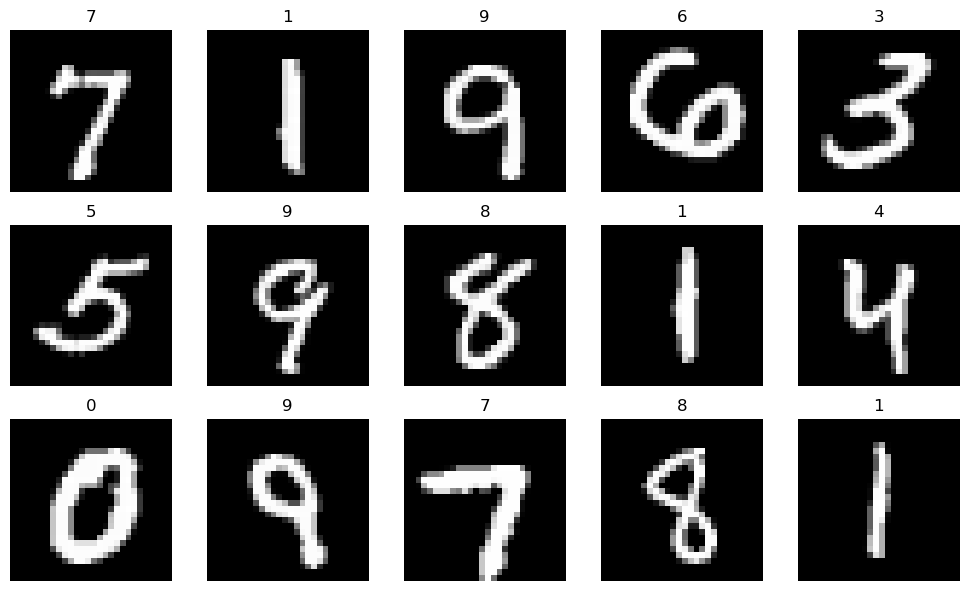

In [35]:
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X)-1)
        img = X[ix]
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.axis("off")
        plt.title(Y[ix])
plt.tight_layout()
plt.show()

In [37]:
# normalizamos los datos

X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., Y[:60000].astype(int), Y[60000:].astype(int)

In [38]:
# función de pérdida y derivada

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def cross_entropy(output, target):
    logits = output[torch.arange(len(output)), target]
    loss = - logits + torch.log(torch.sum(torch.exp(output), axis=-1))
    loss = loss.mean()
    return loss

In [39]:
D_in, H, D_out = 784, 100, 10

# pesos del MLP (copiamos en gpu)
w1 = torch.tensor(np.random.normal(loc=0.0,
          scale = np.sqrt(2/(D_in+H)),
          size = (D_in, H)), requires_grad=True, device="cuda", dtype=torch.float)
b1 = torch.zeros(H, requires_grad=True, device="cuda", dtype=torch.float)

w2 = torch.tensor(np.random.normal(loc=0.0,
          scale = np.sqrt(2/(D_out+H)),
          size = (H, D_out)), requires_grad=True, device="cuda", dtype=torch.float)
b2 = torch.zeros(D_out, requires_grad=True, device="cuda", dtype=torch.float)

# convertimos datos a tensores y copiamos en gpu
X_t = torch.from_numpy(X_train).float().cuda()
Y_t = torch.from_numpy(y_train).long().cuda()

epochs = 100
lr = 0.8
log_each = 10
l = []
for e in range(1, epochs+1):

    # forward
    h = X_t.mm(w1) + b1
    h_relu = h.clamp(min=0) # relu
    y_pred = h_relu.mm(w2) + b2

    # loss
    loss = cross_entropy(y_pred, Y_t)
    l.append(loss.item())

    # Backprop (calculamos todos los gradientes automáticamente)
    loss.backward()

    with torch.no_grad():
        # update pesos
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w2 -= lr * w2.grad
        b2 -= lr * b2.grad

        # ponemos a cero los gradientes para la siguiente iteración
        # (sino acumularíamos gradientes)
        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()

    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")

Epoch 10/100 Loss 1.76980
Epoch 20/100 Loss 1.35429
Epoch 30/100 Loss 1.08615
Epoch 40/100 Loss 0.93128
Epoch 50/100 Loss 0.81376
Epoch 60/100 Loss 0.73110
Epoch 70/100 Loss 0.66851
Epoch 80/100 Loss 0.61951
Epoch 90/100 Loss 0.58045
Epoch 100/100 Loss 0.54709


In [40]:
def evaluate(x):
    h = x.mm(w1) + b1
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2) + b2
    y_probas = softmax(y_pred)
    return torch.argmax(y_probas, axis=1)

In [41]:
from sklearn.metrics import accuracy_score

y_pred = evaluate(torch.from_numpy(X_test).float().cuda())
accuracy_score(y_test, y_pred.cpu().numpy())

0.9342

C:\Users\israe\AppData\Local\Temp\ipykernel_6212\1800604608.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:248.)
  y_pred = evaluate(torch.tensor([img]).float().cuda())[0]


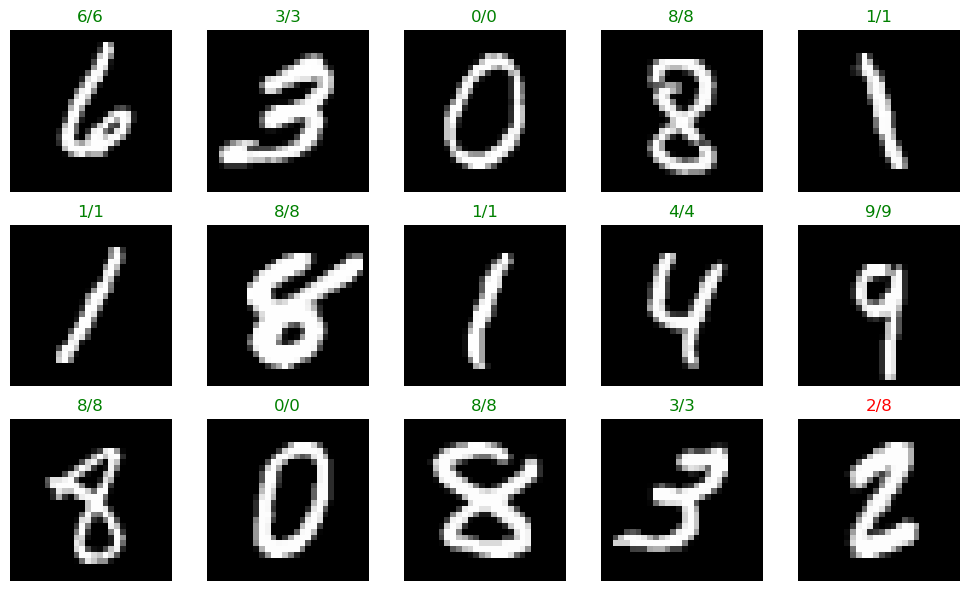

In [42]:
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
test_imgs, test_labs = [], []
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X_test)-1)
        img = X_test[ix]
        y_pred = evaluate(torch.tensor([img]).float().cuda())[0]
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.axis("off")
        plt.title(f"{y_test[ix]}/{y_pred}", color="green" if y_test[ix] == y_pred else "red")
plt.tight_layout()
plt.show()

Como puedes observar, simplemente definiendo los `tensores` para los pesos y los datos y copiándolos a la GPU podemos definir el `grafo computacional` de manera dinámica aplicando operaciones sobre los tensores (multiplicamos por los pesos y sumamos el *bias*). Una vez tenemos la salida del `MLP` calculamos la función de pérdida y llamando a la función `backward` `Pytorch` se encarga de calcular todas las derivadas de manera automática. Una vez tenemos los gradientes con respecto a los pesos, podemos actualizarlos.

## Resumen

En este post hemos visto una introducción a `Pytorch`, un framework de `redes neuronales` muy utilizado a día de hoy. Hemos visto que `Pytorch` es muy similar a `NumPy` y comparten gran parte de su sintaxis, lo cual es una ventaja si ya sabemos trabajar con `NumPy`. Además, añade `autograd`, la capacidad de construir de manera dinámica un `grafo computacional` de manera que en cualquier momento podemos calcular derivadas con respecto a cualquier tensor de manera automática. Por último, hemos visto como podemos ejecutar todas estas operaciones en una GPU para acelerar el proceso de entrenamiento de nuestros modelos de `Deep Learning`. Este es el núcleo de `Pytorch`, sin embargo esta librería nos ofrece más funcionalidad, de la cual hablaremos más adelante, que nos será muy útil para diseñar, entrenar y poner a trabajar nuestras `redes neuronales`.